In [3]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn

In [5]:
def graficar(f, x_i, x_f, num=1000):
    #plt.style.use("seaborn-v0_8-darkgrid")
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose==1:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_regulafalsi(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    p_0 = a
    while n <= num:
        p_i = a - f(a)*((b-a)/(f(b) - f(a)))
        if verbose==1:
            print(f'ite:{n}, a:{a:.9f}, b:{b:.9f}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_newton_raphson(f, df, p_0, tol=1e-4, num=100, verbose=2):
    n = 1
    if verbose==1:
        print(f'ite:0, p_0:{p_0:.9f}')
    while n <= num:
        if df(p_0) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_i = p_0 - f(p_0)/df(p_0)
        if verbose==1:
            print(f'ite:{n}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==2:
                print(f'Solución exacta encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_secante(f, p_i, p_j, tol=1e-4, num=100, verbose=True):
    n = 1
    if verbose:
        print(f'ite:0, p_i:{p_i:.9f}, p_j:{p_j:.9f}')
    while n <= num:
        if f(p_i) - f(p_j) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_n = p_i - f(p_i)*((p_j - p_i)/(f(p_j)-f(p_i)))
        if verbose:
            print(f'ite:{n}, p_j:{p_j:.9f}, p_{n}:{p_n:.9f}')
        if f(p_n) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_n}')
            return p_n
        error = abs(p_n - p_j)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_n}')
                print(f'número de iteraciones: {n}')
            return p_n
        n += 1
        p_i, p_j = p_j, p_n
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True):
    """
    Método del punto fijo
    :param g: Funcion transformada -> punto fijo
    :param p_0: semilla
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :param verbose:
    :param print_error:
    :param deploy_error:
    :return: solución exacta o aproximada, si tiene.
    """
    i = 1
    lista_errores = list()
    while i <= n:
        try:
            p_i = g(p_0)
            e_abs = abs(p_0 - p_i)
            lista_errores.append(e_abs)
            if verbose:
                print(f'ite {i:<2}: p_{i - 1:<2}={p_0:.5f} p_{i:<2}={p_i:.7f}'
                  f' | e_abs: {e_abs:e}')
            if g(p_i) == p_i:
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

            if e_abs < tol:
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

        except OverflowError:
            print('solución no encontrada, OverflowError')
            return None
        p_0 = p_i
        i += 1
    print('solución no encontrada, iteraciones agotadas')
    return None

In [6]:
def LagrangePol(xi, yi):
    # PROCEDIMIENTO
    # Polinomio de Lagrange
    n = len(xi)
    x = sym.Symbol('x')
    polinomio = 0
    divisorL = np.zeros(n, dtype = float)

    for i in range(0,n,1):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j  in range(0,n,1):
            if (j!=i):
                numerador = numerador*(x-xi[j])
                denominador = denominador*(xi[i]-xi[j])
        terminoLi = numerador/denominador
        polinomio = polinomio + terminoLi*yi[i]
        divisorL[i] = denominador

    # simplifica el polinomio
    polisimple = polinomio.expand()

    print('Expresión expandida de los polinomios base de lagrange:')
    print(polinomio)
    print('Polinomio de interpolación de Lagrange:')
    print(polisimple)

    # Gráfica
    x0 = np.linspace(min(xi),max(xi),1000)
    px = sym.lambdify(x,polisimple)

    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    fig, ax = plt.subplots(figsize=(15,6))
    plt.plot(xi, yi,'o', label = 'datos')
    plt.plot(x0, px(x0), label = 'polinomio')
    ax.tick_params(labelsize=14, axis='x')
    ax.tick_params(labelsize=14, axis='y')
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.title(f'Polinomio de interpolación de Lagrange', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

# Ejercicio 1
- Utilice los \textit{nodos} $x_0 = 0.2$, $x_1 = 0.6$, $x_2 = 1.3$ y $x_3 = 1.5$ para encontrar el polinomio de interpolación de Lagrange cúbico para la función $f(x) = e^{x/2} \cos(x/2)$.
- Grafique los puntos, el polinomio de interpolación encontrado y la función $f(x) = e^{x/2} \cos(x/2)$.
- Use el polinomio de interpolación para estimar el valor de $f(1)$ y calcule el error de su aproximación ¿Qué conclusión puede obtener a partir de los resultados obtenidos?

In [12]:
x = np.array([0.2, 0.5, 1.3, 1.5])
f = lambda x: np.exp(x/2)*np.cos(x/2)
y = f(x)
print(x)
print(y)

[0.2 0.5 1.3 1.5]
[1.09964967 1.24410818 1.52493102 1.54898535]


Expresión expandida de los polinomios base de lagrange:
-2.56328593666529*(x - 1.5)*(x - 1.3)*(x - 0.5) + 5.18378406675391*(x - 1.5)*(x - 1.3)*(x - 0.2) - 8.66438079225676*(x - 1.5)*(x - 0.5)*(x - 0.2) + 5.95763595215842*(x - 1.3)*(x - 0.5)*(x - 0.2)
Polinomio de interpolación de Lagrange:
-0.0862467100097208*x**3 + 0.0538572293817605*x**2 + 0.477464520308326*x + 1.00269244727255


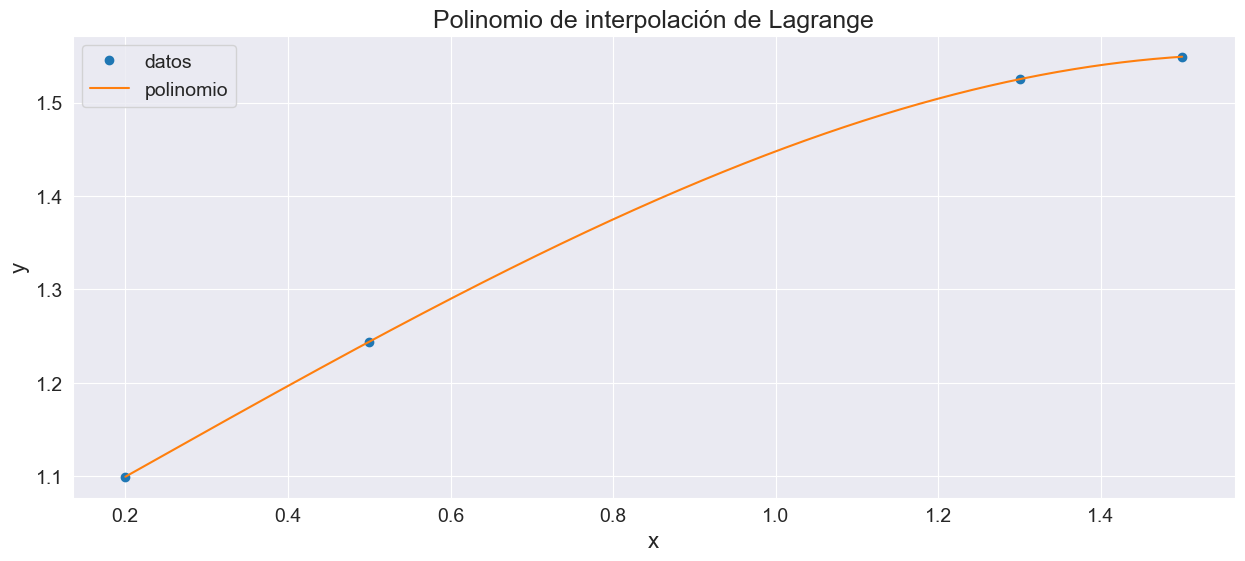

In [10]:
LagrangePol(x,y)

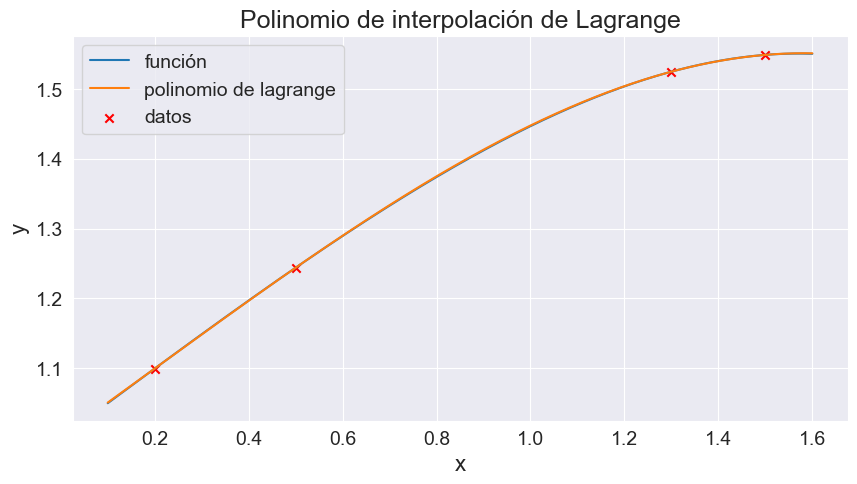

In [15]:
p_lagrange = lambda x: -0.0862467100097208*x**3 + 0.0538572293817605*x**2 + 0.477464520308326*x + 1.00269244727255
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(0.1, 1.6, 1000)

plt.plot(x0, f(x0), label='función')
plt.plot(x0, p_lagrange(x0), label='polinomio de lagrange')
plt.scatter(x, y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Lagrange', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [16]:
print(f(1), p_lagrange(1))
print(abs(f(1) - p_lagrange(1)))


1.4468890365841693 1.4477674869529156
0.0008784503687462308



# Ejercicio 2
- Encuentre el polinomio de interpolación de Lagrange para determinar el valor de $x$ que hace que $f(x) = 0.85$, con base en los siguientes datos:

$$
\begin{array}{|c|c|}
	\hline
	x & f(x) \\
	\hline
	0 & 0 \\
	1 & 0.5 \\
	2 & 0.8 \\
	3 & 0.9 \\
	4 & 0.9411 \\
	5 & 0.9615 \\
	\hline
\end{array}
$$
- Utilice el hecho de que los valores de la tabla se generaron con la función $f(x) = \frac{x^2}{1+x^2}$ para determinar nuevamente el valor de $x$ que corresponde a $f(x) = 0.85$.
- Determine el error entre el polinomio de interpolación encontrado y el valor de la función.

Expresión expandida de los polinomios base de lagrange:
0.0208333333333333*x*(x - 5)*(x - 4)*(x - 3)*(x - 2) - 0.0666666666666667*x*(x - 5)*(x - 4)*(x - 3)*(x - 1) + 0.075*x*(x - 5)*(x - 4)*(x - 2)*(x - 1) - 0.0392125*x*(x - 5)*(x - 3)*(x - 2)*(x - 1) + 0.0080125*x*(x - 4)*(x - 3)*(x - 2)*(x - 1)
Polinomio de interpolación de Lagrange:
-0.00203333333333333*x**5 + 0.0262125*x**4 - 0.106441666666667*x**3 + 0.0663375000000013*x**2 + 0.515924999999999*x


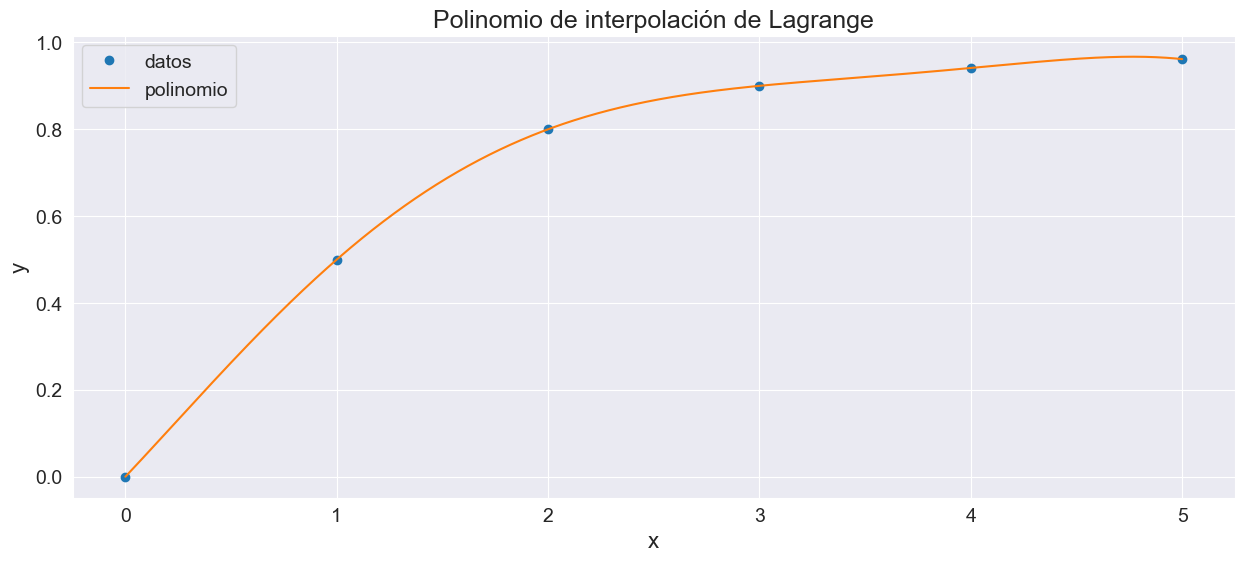

In [18]:
x = np.array([0, 1, 2, 3, 4, 5])
y= np.array([0, 0.5, 0.8, 0.9, 0.9411, 0.9615])
LagrangePol(x,y)

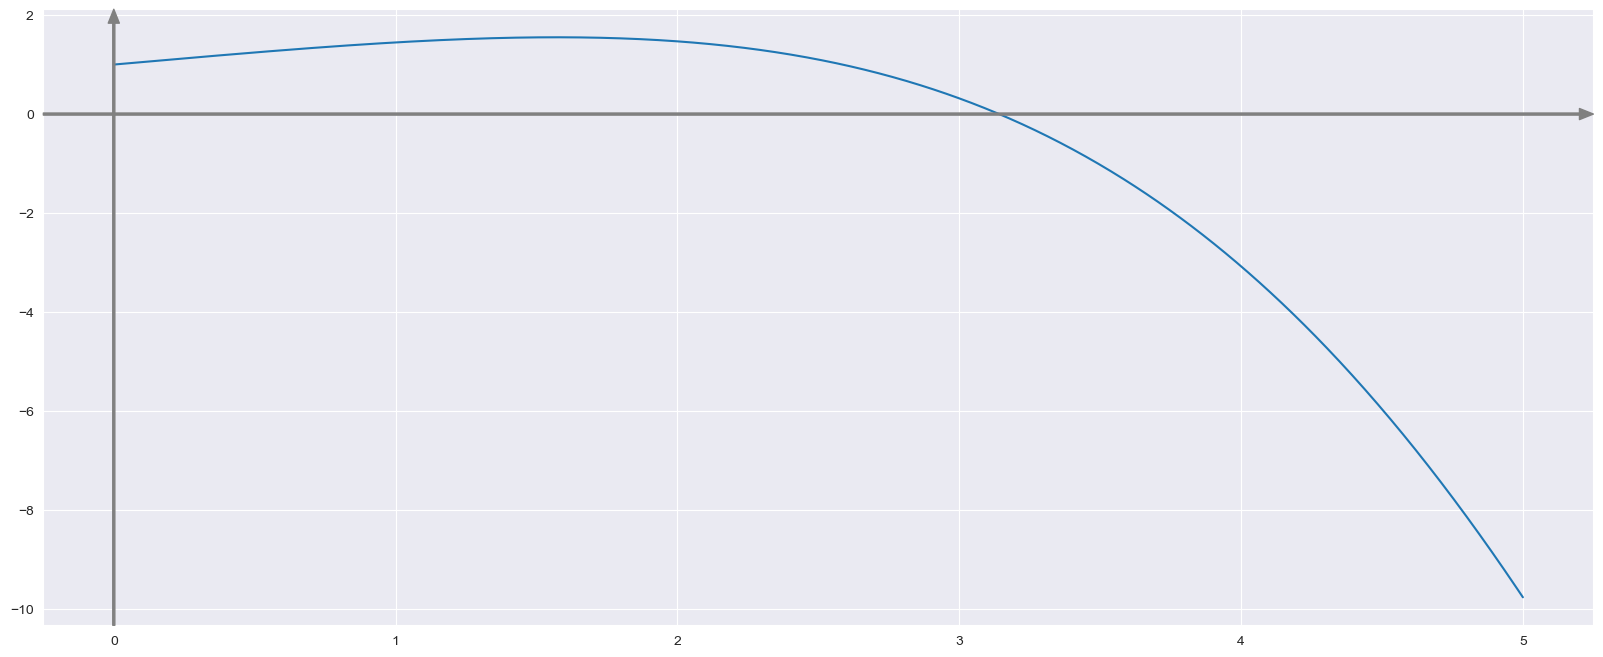

In [24]:
p_lagrange = lambda x: -0.00203333333333333*x**5 + 0.0262125*x**4 - 0.106441666666667*x**3 + 0.0663375000000013*x**2 + 0.515924999999999*x
f_sol = lambda x: p_lagrange(x) - 0.85
graficar(f, 0, 5)

In [29]:
sol_1 = metodo_regulafalsi(f_sol, 1, 5)

Solución aproximada encontrada: 2.340689618494047
número de iteraciones: 19


In [30]:
f_true = lambda x: x**2 / (1 + x**2)
f_sol2 = lambda x: f_true(x) - 0.85
sol_2 = metodo_regulafalsi(f_sol2, 0, 5)

Solución aproximada encontrada: 2.380693495443029
número de iteraciones: 28


In [31]:
print(sol_1, sol_2)
print(abs(sol_1 - sol_2))

2.340689618494047 2.380693495443029
0.04000387694898233


# Ejercicio 3
Supongamos que tenemos un sistema de medición de la temperatura de un proceso químico que produce un producto determinado. Se midió la temperatura cada hora, durante 10 horas, y se obtuvieron los siguientes valores:

\begin{center}
	\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|}
	\hline
	Hora & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
	\hline
	Temperatura (°C) & 100 & 105 & 110 & 117 & 125 & 136 & 148 & 155 & 161 & 166 \\
	\hline
\end{tabular}
\end{center}

Es necesario estimar la temperatura a las 2.5, 5.5 y 9.5 horas después del inicio del proceso, para determinar si el producto se encuentra en la temperatura óptima de producción.

Utilice el método de interpolación de Lagrange para estimar la temperatura en las horas pedidas.

Expresión expandida de los polinomios base de lagrange:
-50*(x - 4)*(x - 3)*(x - 2)/3 + 105*(x - 4)*(x - 3)*(x - 1)/2 - 55*(x - 4)*(x - 2)*(x - 1) + 39*(x - 3)*(x - 2)*(x - 1)/2
Polinomio de interpolación de Lagrange:
x**3/3 - 2*x**2 + 26*x/3 + 93


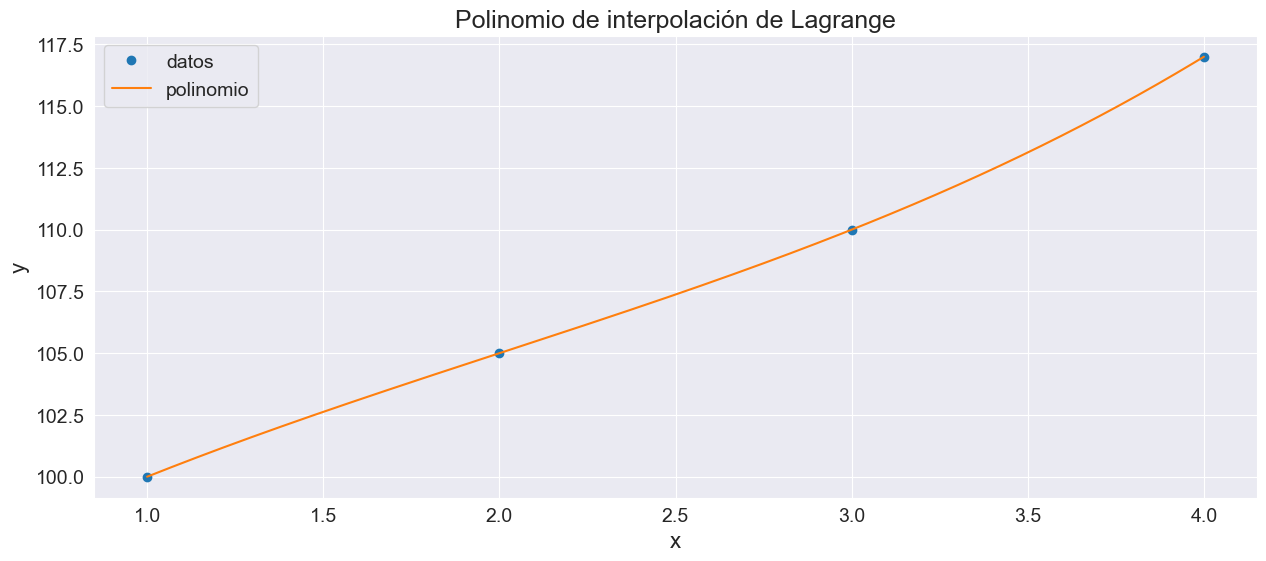

In [33]:
x = np.array([1, 2, 3, 4])
y = np.array([100, 105, 110, 117])
LagrangePol(x,y)

In [34]:
pol_1 = lambda x: x**3/3 - 2*x**2 + 26*x/3 + 93
pol_1(2.5)

107.375

Expresión expandida de los polinomios base de lagrange:
117*(x - 6)*(x - 5)/2 - 125*(x - 6)*(x - 4) + 68*(x - 5)*(x - 4)
Polinomio de interpolación de Lagrange:
3*x**2/2 - 11*x/2 + 115


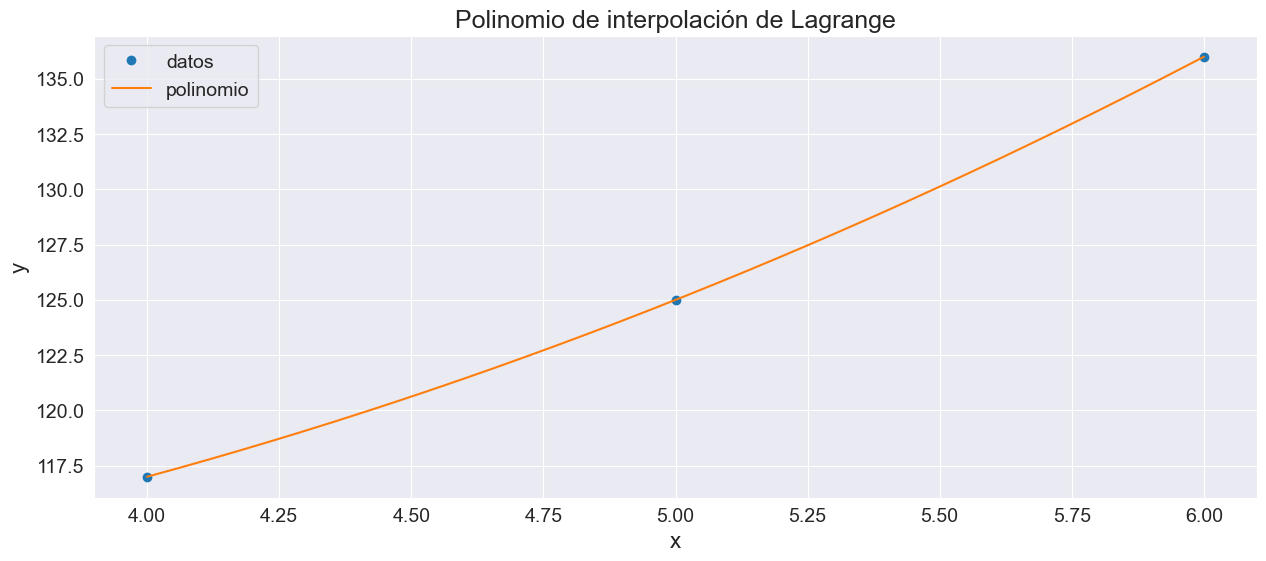

In [35]:
x = np.array([4, 5, 6])
y = np.array([117, 125, 136])
LagrangePol(x,y)

In [36]:
pol_2 = lambda x:3*x**2/2 - 11*x/2 + 115
pol_2(5.5)

130.125

Expresión expandida de los polinomios base de lagrange:
-74*(x - 10)*(x - 9)*(x - 8)/3 + 155*(x - 10)*(x - 9)*(x - 7)/2 - 161*(x - 10)*(x - 8)*(x - 7)/2 + 83*(x - 9)*(x - 8)*(x - 7)/3
Polinomio de interpolación de Lagrange:
-x**2/2 + 29*x/2 + 71


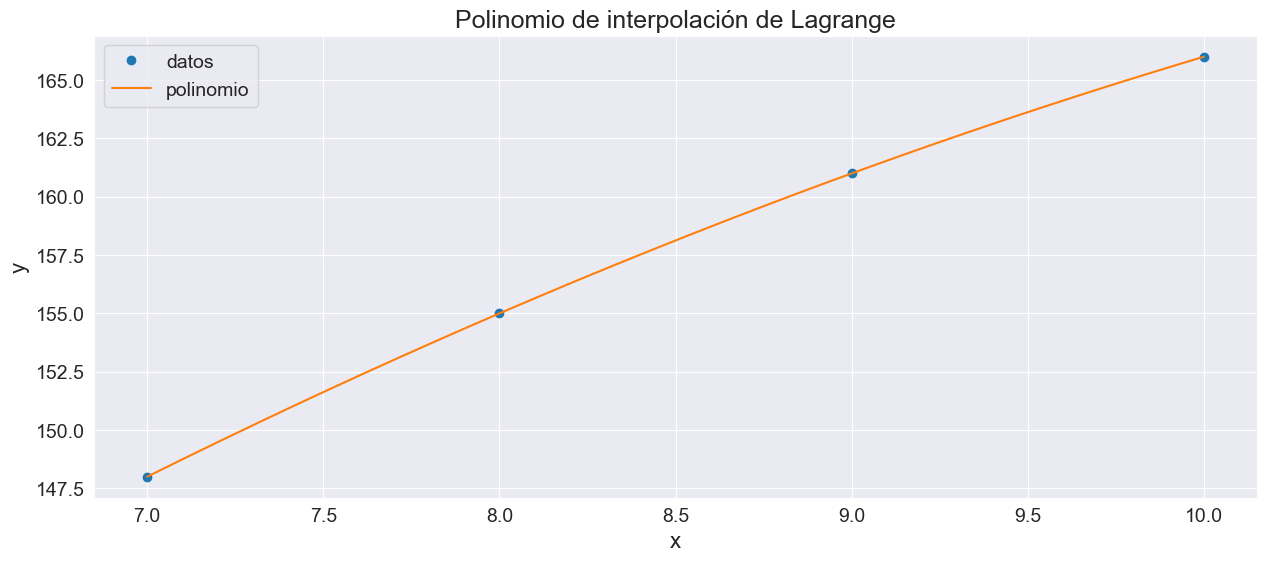

In [37]:
x = np.array([7, 8, 9, 10])
y = np.array([ 148, 155, 161, 166])
LagrangePol(x,y)

In [38]:
pol_3 = lambda x:-x**2/2 + 29*x/2 + 71
pol_3(9.5)

163.625

Expresión expandida de los polinomios base de lagrange:
-5*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)/18144 + (x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 1)/384 - 11*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 2)*(x - 1)/1008 + 13*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 3)*(x - 2)*(x - 1)/480 - 25*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/576 + 17*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/360 - 37*(x - 10)*(x - 9)*(x - 8)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/1080 + 31*(x - 10)*(x - 9)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/2016 - 23*(x - 10)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/5760 + 83*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/181440
Polinomio de interpolación de Lagrange:
-x**9/10080 + 167*x**8/40320 - 713*x**7/10080 + 607*x**6/960 - 895*x**5/288 + 147

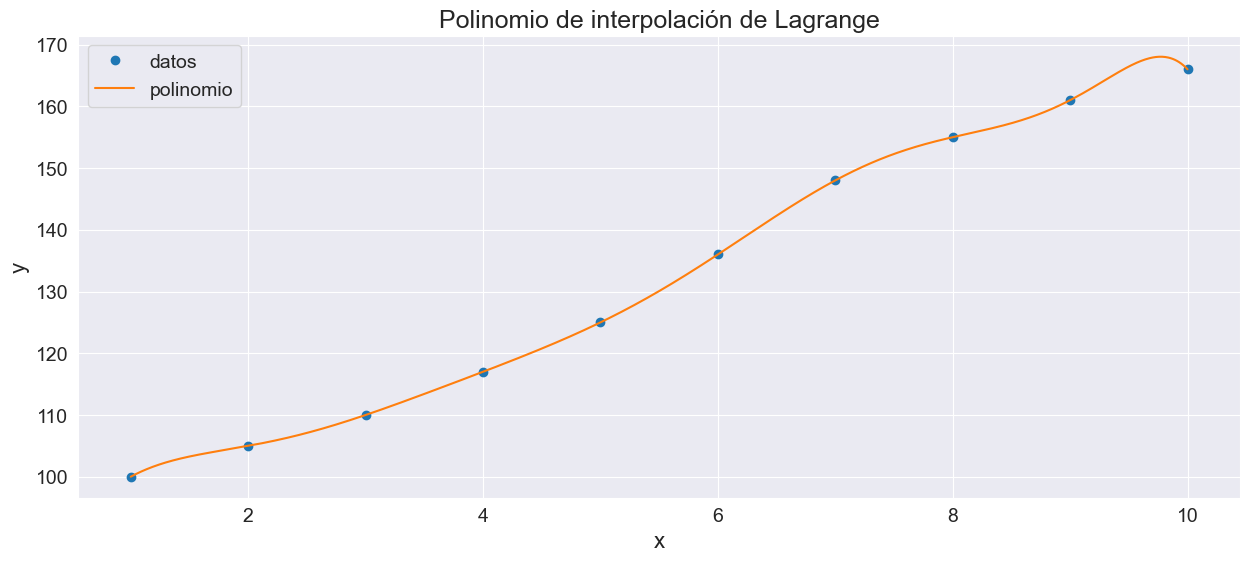

In [39]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([100, 105, 110, 117, 125, 136, 148, 155, 161, 166])
LagrangePol(x,y)

In [40]:
pol_4 = lambda x:-x**9/10080 + 167*x**8/40320 - 713*x**7/10080 + 607*x**6/960 - 895*x**5/288 + 14723*x**4/1920 - 41677*x**3/10080 - 209711*x**2/10080 + 38483*x/840 + 74
pol_4(9.5)

166.44931030275103